# Comparison with sequence-based approaches

In [1]:
import subprocess
import pandas as pd
import math
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

/conda/envs/apegen/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


## MHCFlurry - run the scoring

In [18]:
command = "mhcflurry-predict mhcflurry.csv --out mhcflurry_results.csv"
process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE)

In [19]:
process.wait()
ret = process.returncode

In [20]:
ret

0

## Load MHCFlurry results

In [46]:
mhcf_results = pd.read_csv("mhcflurry_results.csv")

In [47]:
mhcf_results

,allele,peptide,mhcflurry_prediction,mhcflurry_prediction_low,mhcflurry_prediction_high,mhcflurry_prediction_percentile
0,A0101,QSDFHNNRY,11.087870,5.104764,34.680769,0.020500
1,A0101,NSELLNDRY,21.380365,6.084379,78.414153,0.049375
2,A0101,GSDYINANY,37.365680,7.081360,332.816449,0.091250
3,A0101,IINESLLFY,408.543187,60.375255,2275.771955,0.510125
4,A0101,LTEYLSTHY,17.865728,7.225435,35.225294,0.041000
...,...,...,...,...,...,...
33594,B5701,DEEGQDDKD,27474.837560,19905.541444,35736.362435,84.635375
33595,B5701,SEISAFKTC,23170.453072,19236.396215,27390.382039,46.993625
33596,B5701,KQKQNRPIP,26396.439213,21531.978867,33737.152153,76.044625
33597,B5701,QLLSGAHWM,18411.142087,15186.323588,21362.625791,26.706125


In [48]:
# convert MHCFlurry prediction to BA probability

#transform the binding affinity labels
def nM_transform(val):
    if val > 50000: return 0.0
    return 1 - math.log(val)/math.log(50000)

mhcf_results["mhcflurry_ba"] = mhcf_results["mhcflurry_prediction"].apply(nM_transform)

In [49]:
mhcf_results["mhcflurry_ba"]

0        0.777643
1        0.716956
2        0.665358
3        0.444296
4        0.733554
           ...   
33594    0.055339
33595    0.071087
33596    0.059039
33597    0.092337
33598    0.057762
Name: mhcflurry_ba, Length: 33599, dtype: float64

In [50]:
mhcf_results

,allele,peptide,mhcflurry_prediction,mhcflurry_prediction_low,mhcflurry_prediction_high,mhcflurry_prediction_percentile,mhcflurry_ba
0,A0101,QSDFHNNRY,11.087870,5.104764,34.680769,0.020500,0.777643
1,A0101,NSELLNDRY,21.380365,6.084379,78.414153,0.049375,0.716956
2,A0101,GSDYINANY,37.365680,7.081360,332.816449,0.091250,0.665358
3,A0101,IINESLLFY,408.543187,60.375255,2275.771955,0.510125,0.444296
4,A0101,LTEYLSTHY,17.865728,7.225435,35.225294,0.041000,0.733554
...,...,...,...,...,...,...,...
33594,B5701,DEEGQDDKD,27474.837560,19905.541444,35736.362435,84.635375,0.055339
33595,B5701,SEISAFKTC,23170.453072,19236.396215,27390.382039,46.993625,0.071087
33596,B5701,KQKQNRPIP,26396.439213,21531.978867,33737.152153,76.044625,0.059039
33597,B5701,QLLSGAHWM,18411.142087,15186.323588,21362.625791,26.706125,0.092337


## Load NetMHCpan results

In [84]:
netMHCpan = pd.read_csv("NetMHCpan4-1_results.csv")


In [85]:
netMHCpan.columns = ["allele", "peptide", "netmhcpan-el", "netmhcpan-ba"]

In [86]:
netMHCpan["allele"] = netMHCpan["allele"].apply(lambda x: x[4]+x[6:8]+x[9:11])

In [96]:
results_seq = pd.merge(mhcf_results, netMHCpan, on=["allele", "peptide"])

In [97]:
results_seq

,allele,peptide,mhcflurry_prediction,mhcflurry_prediction_low,mhcflurry_prediction_high,mhcflurry_prediction_percentile,mhcflurry_ba,netmhcpan-el,netmhcpan-ba
0,A0101,QSDFHNNRY,11.087870,5.104764,34.680769,0.020500,0.777643,0.995017,0.803086
1,A0101,NSELLNDRY,21.380365,6.084379,78.414153,0.049375,0.716956,0.958418,0.694710
2,A0101,GSDYINANY,37.365680,7.081360,332.816449,0.091250,0.665358,0.942520,0.701433
3,A0101,IINESLLFY,408.543187,60.375255,2275.771955,0.510125,0.444296,0.686023,0.511112
4,A0101,LTEYLSTHY,17.865728,7.225435,35.225294,0.041000,0.733554,0.980310,0.747854
...,...,...,...,...,...,...,...,...,...
33594,B5701,DEEGQDDKD,27474.837560,19905.541444,35736.362435,84.635375,0.055339,0.000000,0.002954
33595,B5701,SEISAFKTC,23170.453072,19236.396215,27390.382039,46.993625,0.071087,0.000252,0.027260
33596,B5701,KQKQNRPIP,26396.439213,21531.978867,33737.152153,76.044625,0.059039,0.000419,0.032294
33597,B5701,QLLSGAHWM,18411.142087,15186.323588,21362.625791,26.706125,0.092337,0.004157,0.075239


## 3pHLA - load the scores

In [99]:
filename = "Results2.csv"

In [100]:
res = pd.read_csv(filename)
res = res.drop(columns=["Unnamed: 0"])
res = res.dropna()

In [101]:
res = res[["allele", "peptide", "ba", "binder", "3pHLA-score"]]

In [102]:
res["mhcflurry"] = results_seq["mhcflurry_ba"]

In [103]:
res["netmhcpan_ba"] = results_seq["netmhcpan-ba"]
res["netmhcpan_el"] = results_seq["netmhcpan-el"]

In [104]:
res["all alleles"] = res["allele"].apply(lambda x:"all alleles")
res

,allele,peptide,ba,binder,3pHLA-score,mhcflurry,netmhcpan_ba,netmhcpan_el,all alleles
0,A0101,QSDFHNNRY,0.574375,1,0.547367,0.777643,0.803086,0.995017,all alleles
1,A0101,NSELLNDRY,0.574375,1,0.489661,0.716956,0.694710,0.958418,all alleles
2,A0101,GSDYINANY,0.574375,1,0.505538,0.665358,0.701433,0.942520,all alleles
3,A0101,IINESLLFY,0.574375,1,0.341056,0.444296,0.511112,0.686023,all alleles
4,A0101,LTEYLSTHY,0.574375,1,0.503116,0.733554,0.747854,0.980310,all alleles
...,...,...,...,...,...,...,...,...,...
33594,B5701,DEEGQDDKD,1.000000,0,0.128606,0.055339,0.002954,0.000000,all alleles
33595,B5701,SEISAFKTC,1.000000,0,0.100223,0.071087,0.027260,0.000252,all alleles
33596,B5701,KQKQNRPIP,1.000000,0,0.084480,0.059039,0.032294,0.000419,all alleles
33597,B5701,QLLSGAHWM,1.000000,0,0.085546,0.092337,0.075239,0.004157,all alleles


In [105]:
res[res["allele"]=="A0201"]

,allele,peptide,ba,binder,3pHLA-score,mhcflurry,netmhcpan_ba,netmhcpan_el,all alleles
100,A0201,TIPPPTLGV,0.574375,1,0.541875,0.283231,0.430162,0.587751,all alleles
101,A0201,MLGHKPVGV,0.574375,1,0.565191,0.586666,0.670954,0.723658,all alleles
102,A0201,LLFEGIARI,0.574375,1,0.544825,0.776765,0.826501,0.942435,all alleles
103,A0201,FLDVNSHKI,0.574375,1,0.551991,0.678193,0.794952,0.949209,all alleles
104,A0201,LIQPLTTYV,0.574375,1,0.511342,0.511256,0.696168,0.715741,all alleles
...,...,...,...,...,...,...,...,...,...
5594,A0201,TLPISKLSY,1.000000,0,0.073353,0.102197,0.052658,0.002974,all alleles
5595,A0201,TAAAAVRQM,1.000000,0,0.206397,0.123374,0.056149,0.001807,all alleles
5596,A0201,AWGQPQCPQ,1.000000,0,0.062569,0.071979,0.012923,0.000005,all alleles
5597,A0201,FRMEMDYKQ,1.000000,0,0.063986,0.147488,0.051197,0.000086,all alleles


## Violin all

3pHLA-score


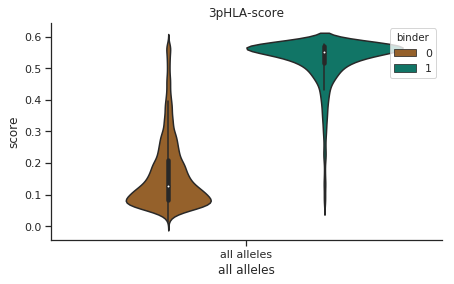

mhcflurry


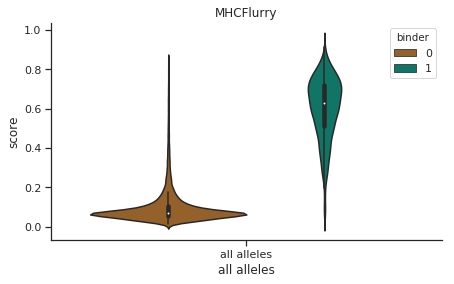

netmhcpan_ba


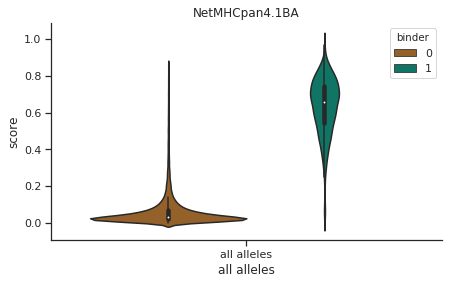

<Figure size 504x288 with 0 Axes>

In [120]:
#these are the cutoffs for outliers
names = ["3pHLA-score", "MHCFlurry", "NetMHCpan4.1BA"]

#ene_fields = ["energy", "pppRF_score", "energy", "energy", "energy", "energy", "energy"]
ba_fields = [ "3pHLA-score", "mhcflurry", "netmhcpan_ba"]

enef_dict = dict(zip(names, ba_fields))

for key, ba in enef_dict.items():
    print(ba)
    #if not cutofs_dict[key] is None: df = df[df[ene]<=cutofs_dict[key]]
    sns.set(rc={"figure.figsize": (7,4), "font.family":"Areal"})
    sns.set_style("ticks")
    sns.despine()
    sns.set(rc={"font.family":"Areal"})
    sns.set_style("ticks")
    res_y = res[ba]
    #if not cutofs_dict[ba] is None:
    #    res_y = res_y.apply(lambda x: x if x<cutofs_dict[ba] else float("nan"))
    ax = sns.violinplot(x="all alleles", y=res_y, hue="binder", data=res, palette={0:"#a6611a", 1:"#018571" })
    ax.set(title=key)
    sns.despine()
    sns.set_style("ticks")
    ax.set(ylabel='score', xlabel='all alleles')
    plt.savefig("./figures/fig2-1-"+key+".pdf")
    plt.show()
    plt.clf()

## Average AUROC / AUPRC

In [122]:
# Compute roc stuff
alleles = res["allele"].unique()
results={}
for key, ba in enef_dict.items():
    
    if ba in ["mhcflurry", "3pHLA-score", "netmhcpan_ba"]:    
        sf_pred = list(res[ba])

    y_true = list(res["binder"])
    fpr, tpr, _ =roc_curve(y_true, sf_pred)
    roc_auc = auc(fpr, tpr)
    func=key
    results[func]={}
    results[func]["fpr"] = fpr
    results[func]["tpr"] = tpr
    results[func]["auc"] = roc_auc
    print("AUROC ("+func+") = "+str(roc_auc))
    prec, rec, _ =precision_recall_curve(y_true, sf_pred)
    ap = average_precision_score(y_true, sf_pred)
    results[func]["prec"] = prec
    results[func]["rec"] = rec
    results[func]["ap"] = ap
    print("AP score ("+func+") = "+str(ap))

AUROC (3pHLA-score) = 0.9769124664445326
AP score (3pHLA-score) = 0.7123328822943241
AUROC (MHCFlurry) = 0.9875853883098012
AP score (MHCFlurry) = 0.8211660338187133
AUROC (NetMHCpan4.1BA) = 0.9911385207648277
AP score (NetMHCpan4.1BA) = 0.8550899011152917


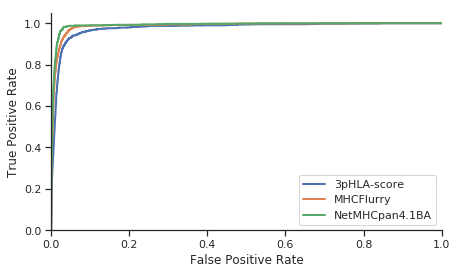

In [123]:
plt.figure()
lw = 2
for func, tmp in results.items():
    plt.plot(results[func]["fpr"], results[func]["tpr"],
             lw=lw, label=func)

#plt.plot([0, 1], [0, 1], label='random classifier', color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
sns.despine()
sns.set_style("ticks")

plt.savefig("./figures/fig2-seq-AUROC.pdf")
plt.show()

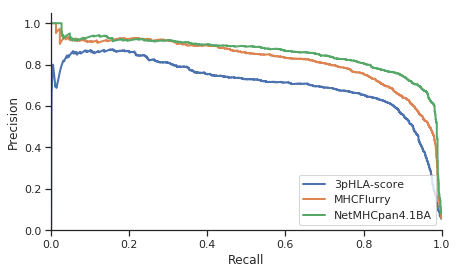

In [124]:
# plot AUPRC

plt.figure()
lw = 2
for func, tmp in results.items():
    plt.plot(results[func]["rec"], results[func]["prec"],
             lw=lw, label=func)
    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower right")
sns.despine()
sns.set_style("ticks")

plt.savefig("./figures/fig2-seq-AUPRC.pdf")
plt.show()

In [125]:

results={}
for key, ba in enef_dict.items():
    func = key
    results[func]={}
    
    for allele in alleles:  
        res_al = res[res["allele"] == allele]   
        sf_pred = list(res_al[ba])
        y_true = list(res_al["binder"])
        fpr, tpr, _ =roc_curve(y_true, sf_pred)
        roc_auc = auc(fpr, tpr)
        results[func][allele]={}
        results[func][allele]["fpr"] = fpr
        results[func][allele]["tpr"] = tpr
        results[func][allele]["auc"] = roc_auc
        print("AUROC ("+func+", "+allele+") = "+str(roc_auc))
              
        prec, rec, _ =precision_recall_curve(y_true, sf_pred)
        ap = average_precision_score(y_true, sf_pred)
        auprc = auc(rec, prec)
        results[func][allele]["prec"] = prec
        results[func][allele]["rec"] = rec
        results[func][allele]["ap"] = ap
        print("AP score ("+func+", "+allele+") = "+str(ap))

AUROC (3pHLA-score, A0101) = 0.99786
AP score (3pHLA-score, A0101) = 0.9569768589998368
AUROC (3pHLA-score, A0201) = 0.977805
AP score (3pHLA-score, A0201) = 0.7156598115895931
AUROC (3pHLA-score, A0301) = 0.9834775
AP score (3pHLA-score, A0301) = 0.7409164824923765
AUROC (3pHLA-score, A1101) = 0.98658
AP score (3pHLA-score, A1101) = 0.7740230694780033
AUROC (3pHLA-score, A2402) = 0.991955
AP score (3pHLA-score, A2402) = 0.9196276010127666
AUROC (3pHLA-score, A2902) = 0.986033016508254
AP score (3pHLA-score, A2902) = 0.86137303982687
AUROC (3pHLA-score, B0702) = 0.98414
AP score (3pHLA-score, B0702) = 0.6950894089851768
AUROC (3pHLA-score, B0801) = 0.980005
AP score (3pHLA-score, B0801) = 0.6682741059134727
AUROC (3pHLA-score, B1501) = 0.9683149999999999
AP score (3pHLA-score, B1501) = 0.8001398291970073
AUROC (3pHLA-score, B2705) = 0.9836174999999999
AP score (3pHLA-score, B2705) = 0.8044365474717794
AUROC (3pHLA-score, B3501) = 0.954505
AP score (3pHLA-score, B3501) = 0.6997207493383

In [130]:
#AUROC

results_format = {}

results_format["allele"] = alleles
for key, ba in enef_dict.items():
    tmp = []
    for allele in alleles:
        tmp.append(results[key][allele]["auc"])
    results_format[key] = tmp

pd.DataFrame(results_format).style.highlight_max(color = 'bisque', axis=1)
#pd.DataFrame(results_format).to_latex("vs_auroc_sup-seq.tex")

,allele,3pHLA-score,MHCFlurry,NetMHCpan4.1BA
0,A0101,0.997860,0.999045,0.998790
1,A0201,0.977805,0.982340,0.986395
2,A0301,0.983478,0.986795,0.988960
3,A1101,0.986580,0.994460,0.995730
4,A2402,0.991955,0.995610,0.997485
5,A2902,0.986033,0.993412,0.994907
6,B0702,0.984140,0.995755,0.997115
7,B0801,0.980005,0.994380,0.995970
8,B1501,0.968315,0.991050,0.990650
9,B2705,0.983617,0.986225,0.991645


In [131]:
#AUROC

results_format = {}


results_format["allele"] = alleles
for key, ba in enef_dict.items():
    tmp = []
    for allele in alleles:
        tmp.append(results[key][allele]["ap"])
    results_format[key] = tmp

pd.DataFrame(results_format).style.highlight_max(color = 'bisque', axis=1)
#pd.DataFrame(results_format).to_latex("vs_auprc_sup-seq.tex")

,allele,3pHLA-score,MHCFlurry,NetMHCpan4.1BA
0,A0101,0.956977,0.976699,0.967984
1,A0201,0.715660,0.767857,0.823205
2,A0301,0.740916,0.808174,0.832935
3,A1101,0.774023,0.901923,0.905915
4,A2402,0.919628,0.877269,0.922089
5,A2902,0.861373,0.851489,0.883255
6,B0702,0.695089,0.897803,0.931435
7,B0801,0.668274,0.891473,0.901494
8,B1501,0.800140,0.817771,0.807565
9,B2705,0.804437,0.737032,0.793621
